In [1]:
import inlaw.nb_util as util
util

<module 'inlaw.nb_util' from '/workspaces/confirmasaurus/inlaw/inlaw/nb_util.py'>

In [2]:
import inlaw.berry as berry
import inlaw.quad as quad
import inlaw.inla as inla
import jax
import numpy as np
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
import scipy.stats

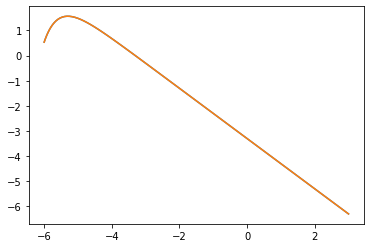

In [37]:
sig2_rule = quad.log_gauss_rule(100, 1e-6, 1e3)
sig2 = sig2_rule.pts
sig2_alpha = 0.0005
sig2_beta = 0.000005
invg_pdf = scipy.stats.invgamma.pdf(sig2, sig2_alpha, scale=sig2_beta)
g_pdf = scipy.stats.gamma.pdf(sig2, sig2_alpha, scale=(1.0 / sig2_beta)*(sig2 ** 2))
plt.plot(np.log10(sig2), np.log10(invg_pdf))
plt.plot(np.log10(sig2), np.log10(g_pdf))
plt.show()

In [36]:
xs = np.linspace(0.3, 0.7, 10)
rr = 4.5
a = scipy.stats.invgamma.pdf(xs, 3, scale=rr)
b = scipy.stats.gamma.pdf(xs, 3, scale=(1.0 /rr) * xs ** 2)
a - b

array([ 4.33680869e-18,  5.20417043e-18,  3.46944695e-17,  0.00000000e+00,
        1.11022302e-16, -1.80411242e-16,  1.38777878e-16,  2.77555756e-17,
       -5.55111512e-17,  0.00000000e+00])

In [7]:
dtype = np.float64
data = berry.figure2_data(N=1)[0].astype(dtype)
inla_ops = berry.optimized(sig2, dtype=dtype).config(
    max_iter=10, opt_tol=dtype(1e-6)
)
logpost, x_max, _, iters = jax.jit(
    inla_ops.laplace_logpost
)(np.zeros((sig2.shape[0], 4), dtype=dtype), dict(sig2=sig2), data)

post = inla.exp_and_normalize(logpost, sig2_rule.wts.astype(dtype), axis=0)

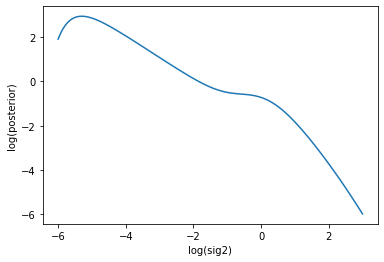

In [8]:
plt.plot(np.log10(sig2), np.log10(post))
plt.xlabel("log(sig2)")
plt.ylabel("log(posterior)")
plt.show()

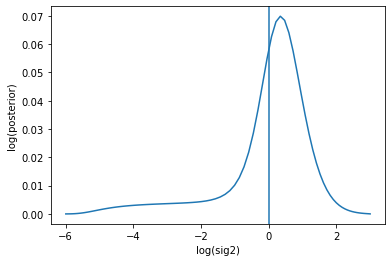

In [11]:
plt.plot(np.log10(sig2), post * sig2_rule.wts)
plt.xlabel("log(sig2)")
plt.ylabel("log(posterior)")
plt.show()

0.002895592619203147